<a href="https://colab.research.google.com/github/vmcarranzam/econometriaR/blob/main/Lab3_Econometria_en_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("PerformanceAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’




In [6]:
library(dplyr)
library(ggplot2)
library(corrplot)
library(PerformanceAnalytics)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is n

# Problema 1

Utilizando R realice una función que dado un dataframe cualquiera de dos columnas, donde la primera (índice 1) sea el valor de la variable independiente (X) y la segunda sea el valor de una variable dependiente (Y), devuelva una lista con los siguientes elementos:

1) Un arreglo con los valores de los estimadores para coeficiente e intercepto
2) El valor del coeficiente de determinación del modelo.
3) El coeficiente de correlación r (raíz cuadrada del inciso anterior).
4) Un arreglo con los valores de los residuos.
5) Una gráfica con la nube de puntos y la recta de regresión del
modelo.

##Dataset

In [20]:
n <- 100
set.seed(33)
X <- runif(n, min = 0, max = 10)
Y <- 2*X + rnorm(n, mean = 0, sd = 1)
df <- data.frame(X, Y)


In [22]:
regresion_lineal <- function(data, x_col, y_col) {
  modelo <- lm(data[[y_col]] ~ data[[x_col]], data = data)

  coeficientes <- coef(modelo)
  r_cuadrado <- summary(modelo)$r.squared
  r <- sqrt(r_cuadrado)
  residuos <- residuals(modelo)
  plot(data[[x_col]], data[[y_col]], xlab = x_col, ylab = y_col)
  abline(modelo, col = "red")
  resultados <- list(coeficientes = coeficientes,
                     r_cuadrado = r_cuadrado,
                     r = r,
                     residuos = residuos)

  return(resultados)
}

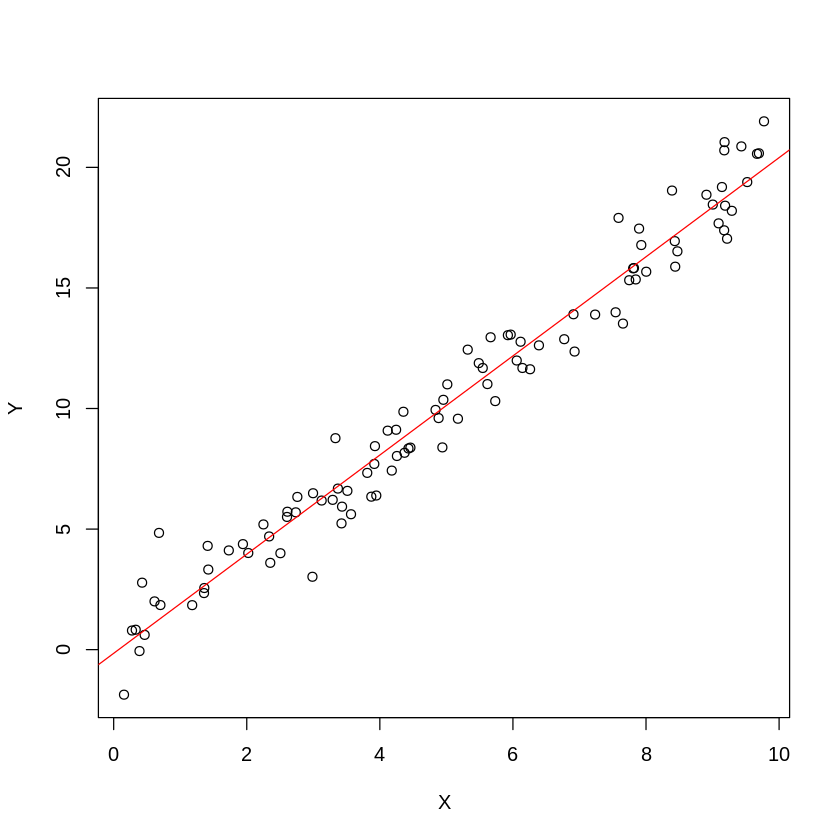

In [23]:
resultados <- regresion_lineal(df, "X", "Y")

coeficientes <- resultados$coeficientes
r_cuadrado <- resultados$r_cuadrado
r <- resultados$r
residuos <- resultados$residuos